# Install relevant libraries

# Import relevant libraries

In [228]:
import pandas as pd

# For plotting a graph
import matplotlib.pyplot as plt
import seaborn as sns
# Regex
import re
# Text Preprocessing
import nltk
# Stop-word removal
from nltk.corpus import stopwords
nltk.download('stopwords')
# Lemmatisation
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#library that contains punctuation
import string
string.punctuation
# Tokenisation
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
# Wordcloud for displaying frequent words
from wordcloud import WordCloud
# Import for training/testing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  # feature extraction
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/natashababu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/natashababu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/natashababu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/natashababu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Import COVID-19 Fake News Dataset

In [11]:
df = pd.read_excel("fake_new_dataset.xlsx")
df.head(7)

,Unnamed: 0,title,text,subcategory,label
0,0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0
1,1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1
2,2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1
3,3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0
4,4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0
5,5,NY TIMES WORRIES HALF OF AMERICANS WILL REFUSE...,The New York Times has published an article by...,false news,0
6,6,Delhi: Eight nurses test positive for Covid-19...,Delhi: Eight nurses test positive for Covid-19...,true,1


- `pd.read_excel()`: Reads the dataset file and stores it as a pandas DataFrame named `df`.
- `df.head(7)`: Displays the first 7 rows of the DataFrame to quickly inspect the data.
---

# EDA

In [14]:
df.dtypes

Unnamed: 0      int64
title          object
text           object
subcategory    object
label           int64
dtype: object

- `df.dtypes`: Displays the data type of each column in the DataFrame.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3119 non-null   int64 
 1   title        3118 non-null   object
 2   text         3119 non-null   object
 3   subcategory  3119 non-null   object
 4   label        3119 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 122.0+ KB


- `df.info()`: Provides a concise summary of the DataFrame, including column names, non-null counts, and data types.

In [21]:
df.shape

(3119, 5)

- `df.shape`: Returns the number of rows and columns in the DataFrame as a tuple `(rows, columns)`.

In [24]:
df.nunique()

Unnamed: 0     3003
title          2744
text           3060
subcategory       3
label             2
dtype: int64

- `df.nunique()`: Returns the number of unique values in each column of the DataFrame.

---
# Check missing values

In [28]:
missing = df.isnull().sum()
missing

Unnamed: 0     0
title          1
text           0
subcategory    0
label          0
dtype: int64

- `df.isnull().sum()`: Calculates the number of missing (null) values in each column.  
- `missing`: Displays the result of the missing values count.

In [31]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,title,text,subcategory,label
84,84,NaN,Can someone tell these fucking idiots in Perth...,false news,0


- `df[df.isnull().any(axis=1)]`: Selects and displays all rows in the DataFrame that contain at least one missing (null) value.

---
# Check duplicate values

In [35]:
duplicate = df.duplicated().sum()
duplicate

0

- `df.duplicated().sum()`: Counts the number of duplicate rows in the DataFrame.  
- `duplicate`: Displays the total number of duplicate rows.
  
Checking missing and duplicate values to ensure data integrity before model training.

---
# Replace Missing Value with Empty String

In [39]:
df["title"] = df["title"].fillna("")

- `df["title"].fillna("")`: Replaces all missing (null) values in the `title` column with an empty string.  
- `df["title"] = ...`: Updates the `title` column with these filled values.

Since the model is going to be trained on combined textual input (title + text), the missing value in "title" is handled by replacing individual missing fields with an empty string because the main content for the text classification still exists in "text", and dropping the row would unnecessarily lead to valid data loss.

---
# Drop irrelevant column

In [43]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,title,text,subcategory,label
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0
1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1
2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1
3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0
4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0


- `df.drop(columns=['Unnamed: 0'])`: Removes the column named `Unnamed: 0` from the DataFrame.  
- `df.head()`: Displays the first 5 rows of the updated DataFrame.

---
# Visualising Class Distribution

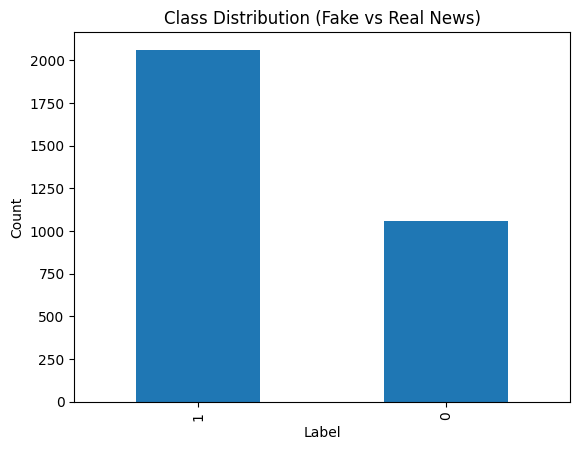

In [145]:
df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution (Fake vs Real News)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

- `df['label'].value_counts().plot(kind='bar')`: Counts the occurrences of each class in the `label` column and creates a bar plot.  
- `plt.title("Class Distribution (Fake vs Real News)")`: Sets the title of the plot.  
- `plt.xlabel("Label")`: Labels the x-axis as "Label".  
- `plt.ylabel("Count")`: Labels the y-axis as "Count".  
- `plt.show()`: Displays the plot.  

**Insights:**

The bar chart helps to visualise the distribution of fake vs real news. From the plot, we can see if the dataset is **balanced or imbalanced**, which is important for choosing the right modelling approach and evaluation metrics.

The dataset is imbalanced, with true news instances outnumbering fake news motivating the use of class weighting during model training.

In [48]:
df['label'].value_counts()

label
1    2061
0    1058
Name: count, dtype: int64

- `df['label'].value_counts()`: Counts the number of occurrences of each class (fake vs real news) in the `label` column.  

**Insights:**

This output provides a clear numeric view of the class distribution. It helps identify whether the dataset is **balanced or imbalanced**, which is crucial for selecting appropriate machine learning algorithms and evaluation metrics.

---
# Visualisation of Subcategories distribution

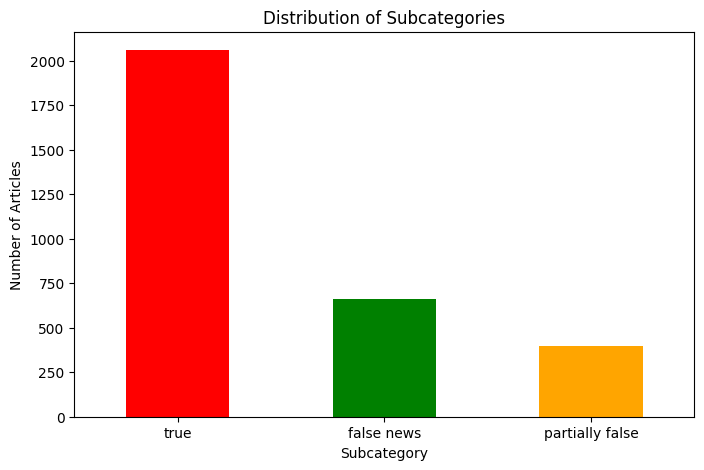

In [181]:
# Count the number of occurrences in each subcategory
counts = df['subcategory'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color=['red', 'green', 'orange'])
plt.title('Distribution of Subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.show()

- `df['subcategory'].value_counts()`: Counts the number of occurrences for each unique subcategory in the dataset.  
- `plt.figure(figsize=(8, 5))`: Sets the size of the plot.  
- `counts.plot(kind='bar', color=['red', 'green', 'orange'])`: Creates a bar chart of subcategory counts with specified colors.  
- `plt.title('Distribution of Subcategories')`: Sets the title of the plot.  
- `plt.xlabel('Subcategory')`: Labels the x-axis as "Subcategory".  
- `plt.ylabel('Number of Articles')`: Labels the y-axis as "Number of Articles".  
- `plt.xticks(rotation=0)`: Rotates the x-axis labels to 0 degrees for readability.  
- `plt.show()`: Displays the plot.  

**Insights:**

The bar chart shows how articles are distributed across different subcategories. It helps identify which subcategories have more or fewer articles, guiding potential data balancing or analysis strategies.

---
# Visualising word count per text for both labels

In [51]:
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

- `df['text_length'] = df['text'].apply(len)`: Creates a new column `text_length` that stores the number of characters in each article's text.  
- `df['word_count'] = df['text'].apply(lambda x: len(x.split()))`: Creates a new column `word_count` that stores the number of words in each article's text.  

**Insights:**

These features help analyze the length of articles in terms of characters and words. They can be useful for text preprocessing, feature engineering, and understanding differences between fake and real news articles.

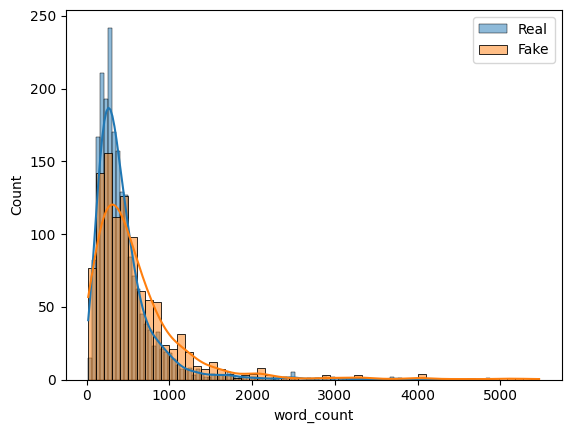

In [52]:
sns.histplot(df[df['label']==1]['word_count'], label='Real', kde=True)
sns.histplot(df[df['label']==0]['word_count'], label='Fake', kde=True)
plt.legend()
plt.show()

- `sns.histplot(df[df['label']==1]['word_count'], label='Real', kde=True)`: Plots a histogram with a KDE curve for the word count of real news articles.  
- `sns.histplot(df[df['label']==0]['word_count'], label='Fake', kde=True)`: Plots a histogram with a KDE curve for the word count of fake news articles.  
- `plt.legend()`: Adds a legend to distinguish between real and fake news.  
- `plt.show()`: Displays the plot.  

**Insights:**

The histogram shows the distribution of word counts for fake vs real news articles. It helps identify whether fake and real news tend to differ in length, which can be a useful feature for classification models.

---
# Combine fields

In [55]:
df['combined_text'] = df['title'] + " " + df['text']
df.head()

,title,text,subcategory,label,text_length,word_count,combined_text
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0,2959,452,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...
1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1,1106,183,Other Viewpoints: COVID-19 is worse than the f...
2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1,907,146,Bermuda's COVID-19 cases surpass 100 The Minis...
3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0,3205,520,Purdue University says students face 'close to...
4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0,18874,3230,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...


- `df['combined_text']`: Combines the `title` and `text` columns into a single column for easier text analysis.  
- `df.head()`: Displays the first 5 rows of the updated DataFrame.  

**Insights:**

Combining title and text creates a unified text field, which is useful for feature extraction and building NLP models for fake news detection.

In [56]:
df['combined_text'].isnull().sum()

0

- `df['combined_text'].isnull().sum()`: Counts the number of missing values in the `combined_text` column.  

**Insights:**

This helps ensure that the combined text column has no missing values, which is important before performing text preprocessing or model training.

---
# Text Preprocessing

## 1. Lowercasing

In [192]:
def lowercase_text(text):
    return text.lower()

# Overwrite original columns safely
df.loc[:, 'combined_text'] = df['combined_text'].apply(lowercase_text)
df.head()

,title,text,subcategory,label,text_length,word_count,combined_text
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0,2959,452,facebook deletes michigan antilockdown group 3...
1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1,1106,183,viewpoint covid19 worse flu officially put res...
2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1,907,146,bermuda covid19 case surpass 100 ministry heal...
3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0,3205,520,purdue university say student face close zero ...
4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0,18874,3230,high cost locking america “ ’ seen year ’ wort...


- `def lowercase_text(text)`: Defines a function to convert text to lowercase.  
- `df['combined_text'].apply(lowercase_text)`: Applies the lowercase function to the `combined_text` column.  
- `df.head()`: Displays the first 5 rows of the updated DataFrame.  

**Insights:**

Converting all text to lowercase standardizes the data, reducing variations caused by capitalization, which improves text analysis and model performance.

Using `.loc` ensures we specifically target the `combined_text` column for modification.

---
## 2. Remove URLS

In [63]:
def remove_urls(text):
    return re.sub(r'https?://\S+|www\.\S+', "", text)

df.loc[:, 'combined_text'] = df['combined_text'].apply(remove_urls)
df.head()

,title,text,subcategory,label,text_length,word_count,combined_text
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0,2959,452,facebook deletes michigan anti-lockdown group ...
1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1,1106,183,other viewpoints: covid-19 is worse than the f...
2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1,907,146,bermuda's covid-19 cases surpass 100 the minis...
3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0,3205,520,purdue university says students face 'close to...
4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0,18874,3230,the high cost of locking down america: “we’ve ...


- `def remove_urls(text)`: Defines a function to remove URLs from a text string using regular expressions.  
- `df.loc[:, 'combined_text'] = df['combined_text'].apply(remove_urls)`: Applies the URL-removal function to the `combined_text` column and updates it in place; `.loc[:, 'combined_text']` is used to safely overwrite the column without affecting other DataFrame data.  
- `df.head()`: Displays the first 5 rows of the updated DataFrame.  

**Insights:**

Removing URLs cleans the text by eliminating irrelevant links, which improves the quality of text data for analysis or model training. 

---

## 3. Remove punctuation and characters

In [66]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
    
#storing the puntuation free text
df.loc[:, 'combined_text'] = df['combined_text'].apply(remove_punctuation)
df.head()

,title,text,subcategory,label,text_length,word_count,combined_text
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0,2959,452,facebook deletes michigan antilockdown group w...
1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1,1106,183,other viewpoints covid19 is worse than the flu...
2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1,907,146,bermudas covid19 cases surpass 100 the ministr...
3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0,3205,520,purdue university says students face close to ...
4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0,18874,3230,the high cost of locking down america “we’ve s...


- `def remove_punctuation(text)`: Defines a function to remove all punctuation from a text string.  
- `df.loc[:, 'combined_text'] = df['combined_text'].apply(remove_punctuation)`: Applies the punctuation-removal function to the `combined_text` column and updates it in place using `.loc` to safely modify the column.  
- `df.head()`: Displays the first 5 rows of the updated DataFrame.  

**Insights:**

Removing punctuation helps clean the text data, reducing noise and improving the quality of features for text analysis or NLP models.


---
## 4. Tokenization

In [72]:
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)
    
df['combined_text'] = df['combined_text'].apply(tokenize_text)
df.head()

,title,text,subcategory,label,text_length,word_count,combined_text
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0,2959,452,"[facebook, deletes, michigan, antilockdown, gr..."
1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1,1106,183,"[other, viewpoints, covid19, is, worse, than, ..."
2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1,907,146,"[bermudas, covid19, cases, surpass, 100, the, ..."
3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0,3205,520,"[purdue, university, says, students, face, clo..."
4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0,18874,3230,"[the, high, cost, of, locking, down, america, ..."


- `from nltk.tokenize import word_tokenize`: Imports the NLTK function for splitting text into words (tokens).  
- `def tokenize_text(text)`: Defines a function to tokenize text into individual words.  
- `df['combined_text'].apply(tokenize_text)`: Applies the tokenization function to the `combined_text` column.  
- `df.head()`: Displays the first 5 rows of the updated DataFrame.  

**Insights:**

Tokenizing the text breaks it into individual words, which is essential for most NLP tasks like feature extraction, text analysis, and building machine learning models.

---
## 5. Stop-word Removal

In [75]:
stop_words = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df.loc[:, 'combined_text'] = df['combined_text'].apply(remove_stopwords)
df.head()

,title,text,subcategory,label,text_length,word_count,combined_text
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0,2959,452,"[facebook, deletes, michigan, antilockdown, gr..."
1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1,1106,183,"[viewpoints, covid19, worse, flu, officially, ..."
2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1,907,146,"[bermudas, covid19, cases, surpass, 100, minis..."
3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0,3205,520,"[purdue, university, says, students, face, clo..."
4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0,18874,3230,"[high, cost, locking, america, “, ’, seen, yea..."


- `stop_words = nltk.corpus.stopwords.words('english')`: Loads a list of common English stopwords from NLTK.  
- `def remove_stopwords(tokens)`: Defines a function to remove stopwords from a list of tokens.  
- `df.loc[:, 'combined_text'] = df['combined_text'].apply(remove_stopwords)`: Applies the stopword-removal function to the `combined_text` column and updates it in place using `.loc`.  
- `df.head()`: Displays the first 5 rows of the updated DataFrame.  

**Insights:**

Removing stopwords eliminates common, non-informative words (like "the", "is", "and") from the text, which reduces noise and improves the relevance of features for NLP models.


---
## 6. Lemmatization

In [78]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
df.loc[:, 'combined_text'] = df['combined_text'].apply(lemmatize_word)
df.head()

,title,text,subcategory,label,text_length,word_count,combined_text
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0,2959,452,facebook deletes michigan antilockdown group 3...
1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1,1106,183,viewpoint covid19 worse flu officially put res...
2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1,907,146,bermuda covid19 case surpass 100 ministry heal...
3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0,3205,520,purdue university say student face close zero ...
4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0,18874,3230,high cost locking america “ ’ seen year ’ wort...


- `def lemmatize_word(text)`: Defines a function to lemmatize each word in the text, reducing it to its base form.  
- `df.loc[:, 'combined_text'] = df['combined_text'].apply(lemmatize_word)`: Applies the lemmatization function to the `combined_text` column and updates it in place using `.loc`.  
- `df.head()`: Displays the first 5 rows of the updated DataFrame.  

**Insights:**

Lemmatization reduces words to their root forms (e.g., "running" → "run"), which standardizes the text and helps improve model performance by reducing redundancy in features.


---
# Most Frequent Term in overall text corpus

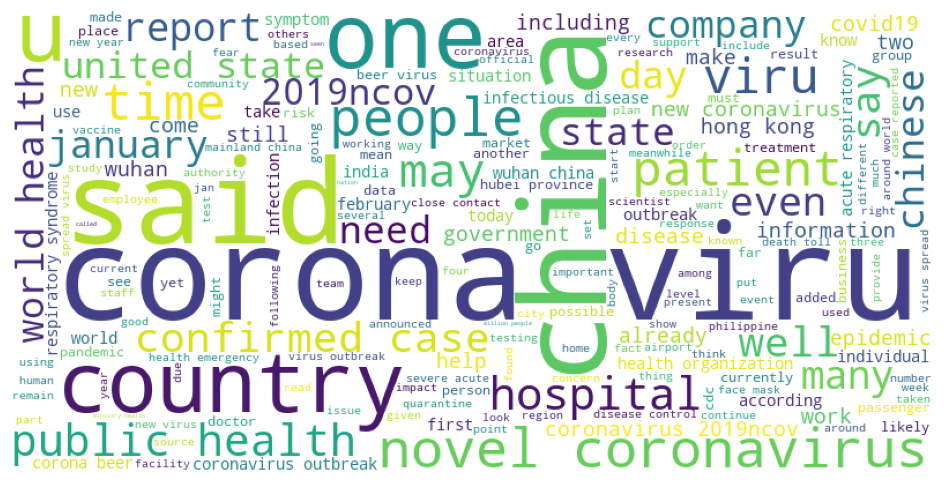

In [212]:
# Combine all text
all_text = ' '.join(df['combined_text'])

# Generate word cloud
wc = WordCloud(
    width=800, 
    height=400, 
    background_color='white',
    colormap='viridis',   # choose color
).generate(all_text)

# Convert to PIL image
image = wc.to_image()

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(image)  # Pass PIL image, not WordCloud object
plt.axis('off')
plt.show()

 - `' '.join(df['combined_text'])`: Combines all text from the `combined_text` column into a single string.  
- `WordCloud(...).generate(all_text)`: Creates a word cloud from the combined text with specified dimensions, background color, and colormap.  
- `wc.to_image()`: Converts the word cloud object into a PIL image for plotting.  
- `plt.imshow(image)`: Displays the word cloud image.  
- `plt.axis('off')`: Hides the axes for a cleaner visualization.  
- `plt.show()`: Renders the plot.  

**Insights:**

The word cloud visually highlights the most frequent words in the dataset, helping identify dominant topics and common terms in the articles.


---
# Split data into train and test

In [222]:
# Features as two separate columns
X = df['combined_text']  # keep as DataFrame with two columns
y = df['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

---
# TF-IDF Vectorisation

In [225]:
tfidf = TfidfVectorizer(
    max_features=5000,  # limit vocabulary size
    ngram_range=(1,2),  # unigrams + bigrams
    min_df=2  # ignore very rare words
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

- `TfidfVectorizer(...)`: Initializes the TF-IDF vectorizer with a maximum of 5000 features, considering unigrams and bigrams, and ignoring very rare words.  
- `tfidf.fit_transform(X_train)`: Fits the vectorizer on the training data and transforms it into TF-IDF feature vectors.  
- `tfidf.transform(X_test)`: Transforms the test data into TF-IDF feature vectors using the same vocabulary learned from the training data.  

**Insights:**

TF-IDF converts text into numerical features reflecting word importance, enabling machine learning models to process textual data for classification.


---
# Train Logistic Regression

In [249]:
#lr = LogisticRegression(max_iter=1000)
lr = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')
lr.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

- `LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')`: Initializes a Logistic Regression model with the 'liblinear' solver, a maximum of 1000 iterations, and balanced class weights to handle class imbalance.  
- `lr.fit(X_train_tfidf, y_train)`: Trains the Logistic Regression model on the TF-IDF features of the training data.  

**Insights:**

The Logistic Regression model learns to classify articles as fake or real based on TF-IDF features, with class weighting helping improve performance on imbalanced datasets.


In [251]:
y_pred_lr = lr.predict(X_test_tfidf)

- `lr.predict(X_test_tfidf)`: Uses the trained Logistic Regression model to predict labels for the test set based on TF-IDF features.  
- `y_pred_lr`: Stores the predicted labels for evaluation.  

**Insights:**

This step generates predictions for the test articles, which can be used to assess the Logistic Regression model’s performance using metrics like accuracy, precision, recall, and F1-score.


In [253]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Accuracy Score:  0.7916666666666666
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       212
           1       0.86      0.82      0.84       412

    accuracy                           0.79       624
   macro avg       0.77      0.78      0.77       624
weighted avg       0.80      0.79      0.79       624

Confusion Matrix:
[[158  54]
 [ 76 336]]


- `accuracy_score(y_test, y_pred_lr)`: Calculates the overall accuracy of the Logistic Regression model on the test set.  
- `classification_report(y_test, y_pred_lr)`: Generates precision, recall, F1-score, and support for each class.  
- `confusion_matrix(y_test, y_pred_lr)`: Computes the confusion matrix showing true vs. predicted labels.  

**Insights:**

These metrics evaluate the performance of the Logistic Regression model. Accuracy shows overall correctness, the classification report provides class-wise performance, and the confusion matrix highlights where the model makes correct or incorrect predictions, guiding further improvements.


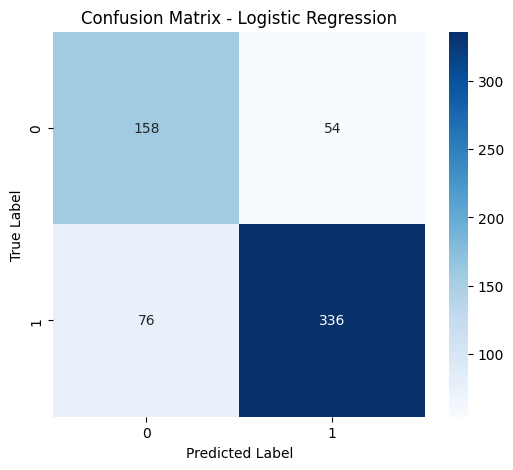

In [255]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

- `confusion_matrix(y_test, y_pred_lr)`: Computes the confusion matrix for Logistic Regression predictions.  
- `sns.heatmap(...)`: Plots the confusion matrix as a heatmap with annotations for easier visualization.  
- `plt.ylabel('True Label')` / `plt.xlabel('Predicted Label')` / `plt.title(...)`: Labels the axes and sets the plot title.  
- `plt.show()`: Displays the heatmap.  

**Insights:**

The heatmap visually represents the Logistic Regression model's performance by showing how many articles were correctly or incorrectly classified as fake or real news, helping identify misclassifications and evaluate class-wise accuracy.


---
# Hyperparameter tuning of Logistic Regression

In [263]:
# Logistic Regression tuning
"""param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],  #Regularisation strength
    'penalty': ['l2'],  # l1 only works with solver='liblinear'
}

grid_lr = GridSearchCV(
    LogisticRegression(class_weight='balanced', max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
"""
lr = LogisticRegression(solver='liblinear', max_iter=1000)  # liblinear works well for small datasets

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],        # Regularization strength
    'penalty': ['l1', 'l2'],             # Regularization type
    'class_weight': [None, 'balanced']   # Handle class imbalance
}

# Grid search with 5-fold cross-validation
grid_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='f1',   # F1 score handles imbalance better
    verbose=2,
    n_jobs=-1
)

grid_lr.fit(X_train_tfidf, y_train)
print(grid_lr.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 1, 'class_weight': None, 'penalty': 'l2'}


- `LogisticRegression(solver='liblinear', max_iter=1000)`: Initializes a Logistic Regression model suitable for small datasets.  
- `param_grid`: Defines a grid of hyperparameters (`C`, `penalty`, `class_weight`) to search over.  
- `GridSearchCV(...)`: Performs grid search with 5-fold cross-validation to find the best hyperparameters using F1-score.  
- `grid_lr.fit(X_train_tfidf, y_train)`: Trains multiple Logistic Regression models with all combinations of hyperparameters on the training data.  
- `grid_lr.best_params_`: Displays the combination of hyperparameters that achieved the best F1-score.  

**Insights:**

Grid search identifies the optimal hyperparameters for Logistic Regression, improving its ability to classify fake and real news, especially when dealing with class imbalance.


In [265]:
# Predictions
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_tfidf)

- `best_lr = grid_lr.best_estimator_`: Selects the Logistic Regression model with the best hyperparameters found from grid search.  
- `y_pred_lr = best_lr.predict(X_test_tfidf)`: Uses the best model to predict labels for the test set.  

**Insights:**

Using the optimized model generates predictions for the test articles, which can be evaluated to assess improvements in performance after hyperparameter tuning.

In [267]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.8108974358974359

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.59      0.68       212
           1       0.82      0.92      0.87       412

    accuracy                           0.81       624
   macro avg       0.81      0.76      0.77       624
weighted avg       0.81      0.81      0.80       624


Confusion Matrix:
 [[126  86]
 [ 32 380]]


- `accuracy_score(y_test, y_pred_lr)`: Calculates the overall accuracy of the optimized Logistic Regression model on the test set.  
- `classification_report(y_test, y_pred_lr)`: Generates precision, recall, F1-score, and support for each class.  
- `confusion_matrix(y_test, y_pred_lr)`: Computes the confusion matrix showing true vs. predicted labels.  

**Insights:**

These evaluation metrics show the performance of the tuned Logistic Regression model. Accuracy reflects overall correctness, the classification report provides detailed class-wise performance, and the confusion matrix helps visualize misclassifications and model effectiveness.


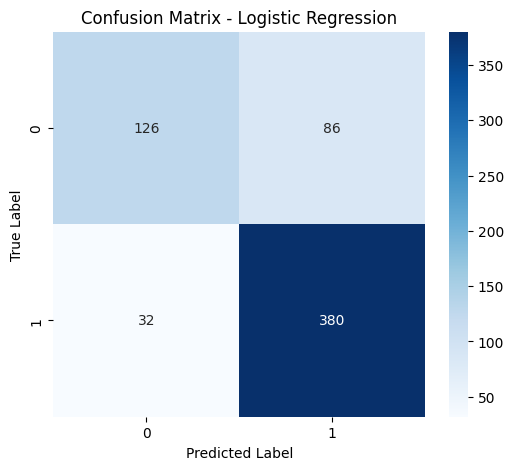

In [273]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=best_lr.classes_, yticklabels=best_lr.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

- `confusion_matrix(y_test, y_pred_lr)`: Computes the confusion matrix for the optimized Logistic Regression predictions.  
- `sns.heatmap(...)`: Plots the confusion matrix as a heatmap with annotations for clear visualization.  
- `plt.ylabel('True Label')` / `plt.xlabel('Predicted Label')` / `plt.title(...)`: Labels the axes and sets the plot title.  
- `plt.show()`: Displays the heatmap.  

**Insights:**

The heatmap visualizes the performance of the tuned Logistic Regression model, showing correct and incorrect predictions for fake and real news, helping identify areas where the model performs well or needs improvement.


# ROC Curve

# Precision-Recall Curve

---
# Train Support Vector Machine (SVC)

In [231]:
svm = SVC(class_weight="balanced", kernel="linear")
svm.fit(X_train_tfidf, y_train)

SVC(class_weight='balanced', kernel='linear')

- `SVC(class_weight="balanced", kernel="linear")`: Initializes a Support Vector Machine classifier with a linear kernel and balanced class weights to handle class imbalance.  
- `svm.fit(X_train_tfidf, y_train)`: Trains the SVM model on the TF-IDF features of the training data.  

**Insights:**

The SVM learns to separate fake and real news articles based on the TF-IDF features. Using `class_weight="balanced"` ensures the model accounts for any imbalance in class distribution.


In [163]:
y_pred_svm = svm.predict(X_test_tfidf)

- `svm.predict(X_test_tfidf)`: Uses the trained SVM model to predict the labels of the test data based on TF-IDF features.  
- `y_pred_svm`: Stores the predicted labels for the test set.  

**Insights:**

This step generates predictions for the test articles, which can then be used to evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.


In [164]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy Score:  0.7900641025641025
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       212
           1       0.85      0.83      0.84       412

    accuracy                           0.79       624
   macro avg       0.77      0.77      0.77       624
weighted avg       0.79      0.79      0.79       624

Confusion Matrix:
[[152  60]
 [ 71 341]]


- `accuracy_score(y_test, y_pred_svm)`: Calculates the overall accuracy of the SVM model on the test set.  
- `classification_report(y_test, y_pred_svm)`: Generates a detailed report including precision, recall, F1-score, and support for each class.  
- `confusion_matrix(y_test, y_pred_svm)`: Displays the confusion matrix showing true vs. predicted labels.  

**Insights:**

These metrics help evaluate the performance of the SVM model. Accuracy shows overall correctness, the classification report gives per-class performance, and the confusion matrix visualizes where the model is making correct or incorrect predictions, helping identify strengths and weaknesses.


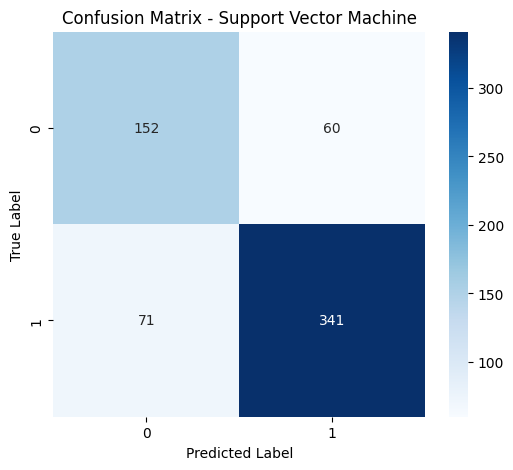

In [167]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

- `confusion_matrix(y_test, y_pred_svm)`: Computes the confusion matrix for the SVM predictions.  
- `sns.heatmap(...)`: Plots the confusion matrix as a heatmap with annotations for easier visualization.  
- `plt.ylabel('True Label')` / `plt.xlabel('Predicted Label')` / `plt.title(...)`: Labels the axes and sets the plot title.  
- `plt.show()`: Displays the heatmap.  

**Insights:**

The heatmap visually represents the performance of the SVM model by showing how many articles were correctly or incorrectly classified as fake or real news. It helps quickly identify misclassifications and class-wise performance.

--- 
# Hyperparameter tuning of Support Vector Machine(SVM)

In [169]:
svm = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'kernel': ['linear', 'rbf'],     # Linear or RBF kernel
    'class_weight': [None, 'balanced']
}

# Grid search with 5-fold cross-validation
grid_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # f1 is good for imbalanced classes
    verbose=2,
    n_jobs=-1
)

grid_svm.fit(X_train_tfidf, y_train)
print(grid_svm.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'C': 1, 'class_weight': None, 'kernel': 'rbf'}


- `SVC()`: Initializes a Support Vector Machine classifier.  
- `param_grid`: Defines a grid of hyperparameters (`C`, `kernel`, `class_weight`) to search over.  
- `GridSearchCV(...)`: Performs a grid search with 5-fold cross-validation to find the best hyperparameters using F1-score.  
- `grid_svm.fit(X_train_tfidf, y_train)`: Trains multiple SVM models with all combinations of hyperparameters on the training data.  
- `grid_svm.best_params_`: Displays the combination of hyperparameters that achieved the best F1-score.  

**Insights:**

Grid search identifies the optimal hyperparameters for the SVM model, improving its ability to classify fake and real news effectively, especially in the presence of class imbalance.


In [170]:
# Prediction
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_tfidf)

- `best_svm = grid_svm.best_estimator_`: Selects the SVM model with the best hyperparameters found from grid search.  
- `y_pred_svm = best_svm.predict(X_test_tfidf)`: Uses the optimized SVM model to predict labels for the test set.  

**Insights:**

Using the best SVM model generates predictions for the test articles, allowing evaluation of its performance after hyperparameter tuning to improve classification of fake and real news.


In [171]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.8205128205128205

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.62      0.70       212
           1       0.83      0.92      0.87       412

    accuracy                           0.82       624
   macro avg       0.82      0.77      0.79       624
weighted avg       0.82      0.82      0.81       624


Confusion Matrix:
 [[132  80]
 [ 32 380]]


- `accuracy_score(y_test, y_pred_svm)`: Calculates the overall accuracy of the optimized SVM model on the test set.  
- `classification_report(y_test, y_pred_svm)`: Generates precision, recall, F1-score, and support for each class.  
- `confusion_matrix(y_test, y_pred_svm)`: Computes the confusion matrix showing true vs. predicted labels.  

**Insights:**

These metrics evaluate the performance of the tuned SVM model. Accuracy reflects overall correctness, the classification report provides detailed class-wise performance, and the confusion matrix visualizes misclassifications and model effectiveness.


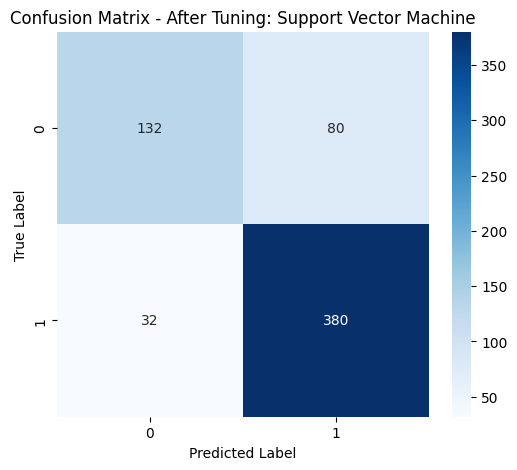

In [275]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=best_svm.classes_, yticklabels=best_svm.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - After Tuning: Support Vector Machine')
plt.show()

- `confusion_matrix(y_test, y_pred_svm)`: Computes the confusion matrix for the optimized SVM predictions.  
- `sns.heatmap(...)`: Plots the confusion matrix as a heatmap with annotations for better visualization.  
- `plt.ylabel('True Label')` / `plt.xlabel('Predicted Label')` / `plt.title(...)`: Labels the axes and sets the plot title.  
- `plt.show()`: Displays the heatmap.  

**Insights:**

The heatmap visually shows the performance of the tuned SVM model, highlighting correct and incorrect classifications of fake and real news, and helping assess improvements after hyperparameter tuning.


# ROC Curve

# Precision-Recall Curve

# Comparison Graph

# Comaprison Table

---
# Covid-19 News Aunthenticity Classification

In [177]:
def predict_news(title, text, model, vectorizer):
    # combine title and text (same as training)
    combined_text = title + " " + text
    # apply TF-IDF transformation
    transformed_text = vectorizer.transform([combined_text])
    # prediction
    prediction = model.predict(transformed_text)[0]
    if prediction == 1:
        return "True News"
    else: 
        return "Fake / Partially False News"

# Enter values
title_input = input("Enter news title: ")
text_input = input("Enter news content: ")

# Prediction using Support Vector Machine (SVM)
result = predict_news(title_input, text_input, best_svm, tfidf)
print("News Prediction:", result)

Enter news title:  Bermuda's COVID-19 cases surpass 100
Enter news content:  The Ministry of Health in Bermuda has confirmed a newspaper report that 10 residents from the Westmeath Residential and Nursing Home had tested positive for COVID-19, taking the island’s total confirmed cases past the 100 mark. A further 213 of the 1,173 tests that have been carried out, were received from across Bermuda yesterday and today, all of which were negative, the ministry said on Saturday night. These included 74 essential workers, who received negative results at the new drive-through testing facility at Southside, near the international airport, which remains closed to regular commercial flights. Bermuda is under lockdown until May 2, although more businesses are being allowed to reopen on a limited basis. The island has a total of 109 confirmed cases, of which 65 are active. Eleven people are in hospital, 54 are being actively monitored and 39 have recovered. Five people have died.


News Prediction: True News


- `def predict_news(title, text, model, vectorizer)`: Defines a function to predict whether a news article is fake or real.  
- `combined_text = title + " " + text`: Combines the title and text for consistent preprocessing.  
- `vectorizer.transform([combined_text])`: Converts the combined text into TF-IDF features using the trained vectorizer.  
- `model.predict(transformed_text)`: Uses the trained model to predict the label of the input text.  
- `if prediction == 1: ... else ...`: Returns a human-readable prediction ("True News" or "Fake / Partially False News").  
- `title_input = input(...)` / `text_input = input(...)`: Takes user input for title and content.  
- `result = predict_news(title_input, text_input, best_svm, tfidf)`: Gets the prediction using the optimized SVM model.  
- `print("News Prediction:", result)`: Displays the prediction to the user.  

**Insights:**

This function allows real-time prediction of new articles using the trained and tuned SVM model. It standardizes input, transforms it into TF-IDF features, and outputs whether the news is likely real or fake, demonstrating practical application of the trained NLP model.
